hmwk # 1

* There are 19 columns in yellow taxi trips for Jan-22
* Standard deviation of the duration column is 46.45
* Percentage of rows remaining: 98.275%
* Dimensionality: 516
* RMSE of training: 7.001
* RMSE of validation: 7.795

In [20]:
!python -V
!conda install -y pandas seaborn matplotlib scikit-learn pyarrow fastparquet

Python 3.10.11
Solving environment: done

# All requested packages already installed.



In [1]:
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [2]:
# Provide the URL of the Parquet file
training_url = "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2022-01.parquet"

# Read the Parquet file into a pandas DataFrame
train_df = pd.read_parquet(training_url)

# Explore the DataFrame or perform further data processing
print(train_df.head())

# Provide the URL of the Parquet file
validation_url = "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2022-02.parquet"

# Read the Parquet file into a pandas DataFrame
val_df = pd.read_parquet(validation_url)

# Explore the DataFrame or perform further data processing
print(val_df.head())


   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2022-01-01 00:35:40   2022-01-01 00:53:29              2.0   
1         1  2022-01-01 00:33:43   2022-01-01 00:42:07              1.0   
2         2  2022-01-01 00:53:21   2022-01-01 01:02:19              1.0   
3         2  2022-01-01 00:25:21   2022-01-01 00:35:23              1.0   
4         2  2022-01-01 00:36:48   2022-01-01 01:14:20              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           3.80         1.0                  N           142           236   
1           2.10         1.0                  N           236            42   
2           0.97         1.0                  N           166           166   
3           1.09         1.0                  N           114            68   
4           4.30         1.0                  N            68           163   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \


In [4]:
from prep import column_mods

train_df = column_mods(train_df)
categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

train_df[categorical] = train_df[categorical].astype(str)

print(train_df.head())
print("Standard deviation of the trip's duration in minutes: ", train_df['duration'].std())


   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2022-01-01 00:35:40   2022-01-01 00:53:29              2.0   
1         1  2022-01-01 00:33:43   2022-01-01 00:42:07              1.0   
2         2  2022-01-01 00:53:21   2022-01-01 01:02:19              1.0   
3         2  2022-01-01 00:25:21   2022-01-01 00:35:23              1.0   
4         2  2022-01-01 00:36:48   2022-01-01 01:14:20              1.0   

   trip_distance  RatecodeID store_and_fwd_flag PULocationID DOLocationID  \
0           3.80         1.0                  N          142          236   
1           2.10         1.0                  N          236           42   
2           0.97         1.0                  N          166          166   
3           1.09         1.0                  N          114           68   
4           4.30         1.0                  N           68          163   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             1  ...      0

In [5]:
# Filter the dataframe based on the duration condition
filtered_df = train_df[(train_df['duration'] >= 1) & (train_df['duration'] <= 60)]

# Calculate the percentage of rows that remained
percentage_remaining = (len(filtered_df) / len(train_df)) * 100

# Print the percentage
print(f"Percentage of rows remaining: {percentage_remaining}%")


Percentage of rows remaining: 98.27547930522405%


Dimensionality: 516
7.001496179475462


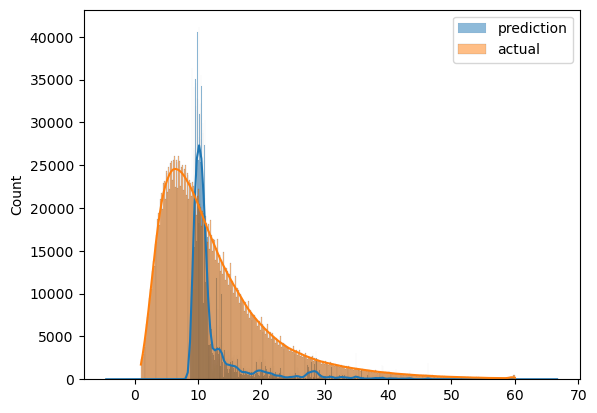

In [6]:
from fit import lr_fit_check

y_pred, y_train, mean_squared_error, dv, lr = lr_fit_check(filtered_df, categorical, numerical, target='duration')
print(mean_squared_error)

with open('../models/lin_reg.bin', 'wb') as f_out:
    pickle.dump((dv, lr), f_out)

# Create separate histogram plots for y_pred and y_train
sns.histplot(y_pred, label='prediction', kde=True)
sns.histplot(y_train, label='actual', kde=True)

# Adding a legend
plt.legend()

# Display the plot
plt.show()


In [26]:
val_df = column_mods(val_df)
categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

val_df[categorical] = val_df[categorical].astype(str)

print(val_df.head())
print("Standard deviation of the trip's duration in minutes: ", val_df['duration'].std())


   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count   
0         1  2022-02-01 00:06:58   2022-02-01 00:19:24              1.0  \
1         1  2022-02-01 00:38:22   2022-02-01 00:55:55              1.0   
2         1  2022-02-01 00:03:20   2022-02-01 00:26:59              1.0   
3         2  2022-02-01 00:08:00   2022-02-01 00:28:05              1.0   
4         2  2022-02-01 00:06:48   2022-02-01 00:33:07              1.0   

   trip_distance  RatecodeID store_and_fwd_flag PULocationID DOLocationID   
0           5.40         1.0                  N          138          252  \
1           6.40         1.0                  N          138           41   
2          12.50         1.0                  N          138          200   
3           9.88         1.0                  N          239          200   
4          12.16         1.0                  N          138          125   

   payment_type  ...  mta_tax  tip_amount  tolls_amount   
0             1  ...      0

In [27]:
# Filter the dataframe based on the duration condition
filtered_val = val_df[(val_df['duration'] >= 1) & (val_df['duration'] <= 60)]

# Calculate the percentage of rows that remained
percentage_remaining = (len(filtered_val) / len(val_df)) * 100

# Print the percentage
print(f"Percentage of rows remaining: {percentage_remaining}%")


Percentage of rows remaining: 97.9444397269143%


In [28]:

from test import apply_model
# Apply the model to the new dataset
y_pred_val, y_val, mse_val = apply_model(filtered_val, categorical, numerical, dv, lr)

# Evaluate the accuracy
print("Mean Squared Error:", mse_val)


Mean Squared Error: 7.795498189562631


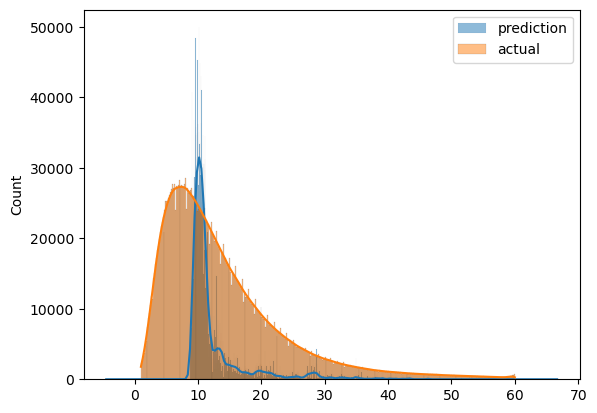

In [29]:
# Create separate histogram plots for y_pred and y_train
sns.histplot(y_pred_val, label='prediction', kde=True)
sns.histplot(y_val, label='actual', kde=True)

# Adding a legend
plt.legend()

# Display the plot
plt.show()
